In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment 

In [2]:
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values in SL,SW,PL columns

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data.shape

(150, 5)

In [8]:
#plotting each metric to fill missing values

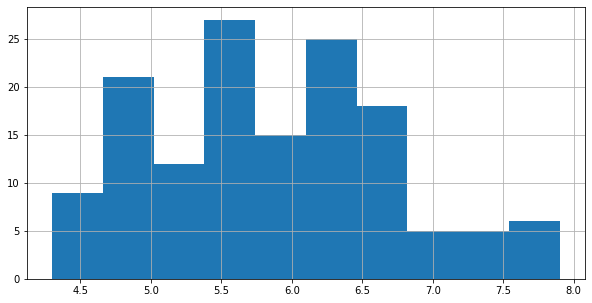

In [9]:
freqgraph = data.SL
freqgraph.hist(figsize=(10,5))
plt.show()

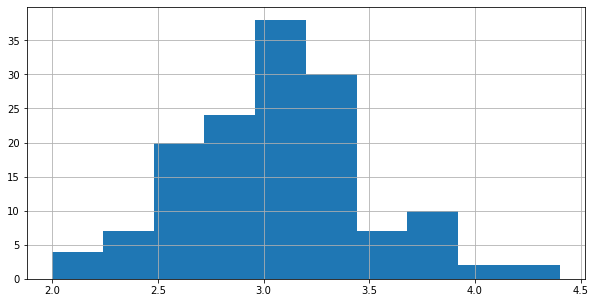

In [10]:
freqgraph = data.SW
freqgraph.hist(figsize=(10,5))
plt.show()

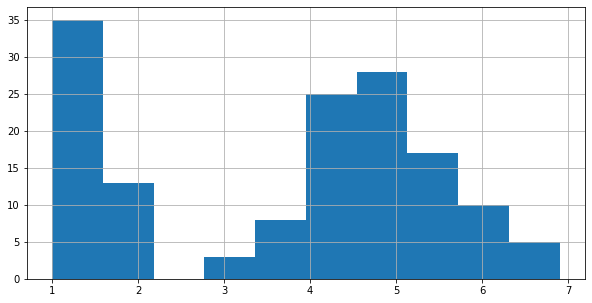

In [11]:
freqgraph = data.PL
freqgraph.hist(figsize=(10,5))
plt.show()

In [12]:
# we've missing values in SL,SW,PL columns and we are filling it with mean
for i in ['SL', 'SW', 'PL']:
  data[i] = data[i].fillna(data[i].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
# to find outliers we need to plot boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1966935b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x196693630d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1966935b6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19669363790>],
 'fliers': [<matplotlib.lines.Line2D at 0x19669363af0>],
 'means': []}

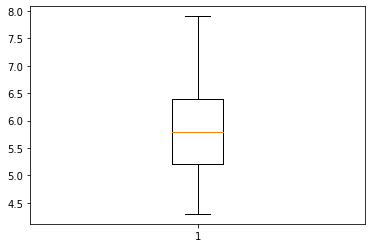

In [15]:
plt.boxplot(data["SL"])

In [16]:
#no outliers in SL

{'whiskers': [<matplotlib.lines.Line2D at 0x196693becd0>,
 'caps': [<matplotlib.lines.Line2D at 0x196693cc3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196693be970>],
 'medians': [<matplotlib.lines.Line2D at 0x196693cca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x196693ccdf0>],
 'means': []}

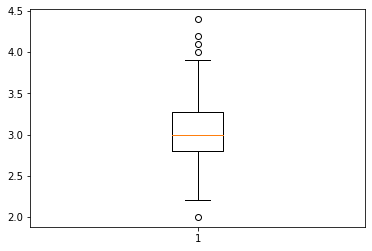

In [17]:
plt.boxplot(data["SW"])

In [18]:
#there're outliers in SW

{'whiskers': [<matplotlib.lines.Line2D at 0x196694274f0>,
 'caps': [<matplotlib.lines.Line2D at 0x19669427bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19669427190>],
 'medians': [<matplotlib.lines.Line2D at 0x1966942f2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1966942f610>],
 'means': []}

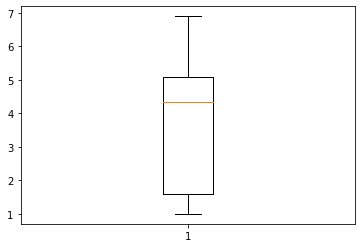

In [19]:
plt.boxplot(data["PL"])

In [20]:
#no outliers in PL

{'whiskers': [<matplotlib.lines.Line2D at 0x196694852e0>,
 'caps': [<matplotlib.lines.Line2D at 0x196694859a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19669476f40>],
 'medians': [<matplotlib.lines.Line2D at 0x196694910a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19669491400>],
 'means': []}

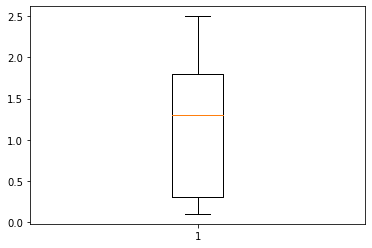

In [21]:
plt.boxplot(data["PW"])

In [22]:
#no outliers in PW

In [23]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

In [24]:
IQR = Q3 -Q1
print(IQR)

0.4500000000000002


In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [26]:
print(lower_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


In [27]:
outlier = []
for x in data["SW"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)

print("outliers:" , outlier)

outliers: [4.0, 4.4, 4.1, 4.2, 2.0]


In [28]:
ind1 = data['SW']>upper_limit
index1 = data.loc[ind1].index
index1

Int64Index([14, 15, 32, 33], dtype='int64')

In [29]:
data.drop(index1, inplace = True)

In [30]:
ind2 = data['SW']<lower_limit
index2=data.loc[ind2].index
index2

Int64Index([60], dtype='int64')

In [31]:
data.drop(index2, inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x196694eee20>,
 'caps': [<matplotlib.lines.Line2D at 0x196694fc520>,
 'boxes': [<matplotlib.lines.Line2D at 0x196694eeac0>],
 'medians': [<matplotlib.lines.Line2D at 0x196694fcbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196694fcf40>],
 'means': []}

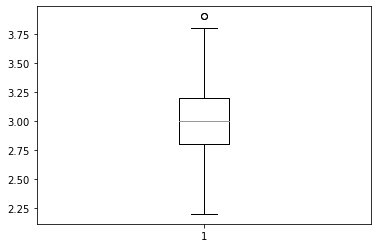

In [33]:
plt.boxplot(data["SW"])

# 3. Find out which classification model gives the best result to predict irisspecies.(also do random forest algorithm)


LOGISTIC REGRESSION

In [34]:
x = data.drop(["Classification"],axis=1)
y = data["Classification"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)


C:\Users\Minnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = logit_model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))

accuracy_score 0.9310344827586207
precision_score 0.9310344827586207
f1_score 0.9310344827586207


In [39]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    acc_values.append(acc)
    

In [41]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

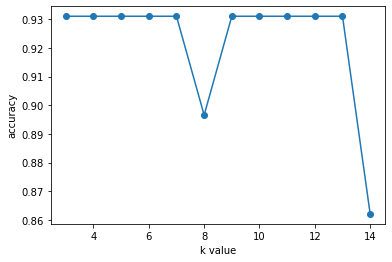

In [42]:
#now plot the accuracy values in a graph
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [43]:
#from plot we get highest accuracy at k=4

In [44]:
classifier = KNeighborsClassifier(n_neighbors= 4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [45]:
print('accuracy_score',accuracy_score(y_test,y_pred_knn))
print('precision_score',precision_score(y_test,y_pred_knn,average="weighted"))
print('f1_score',f1_score(y_test,y_pred_knn,average="weighted"))

accuracy_score 0.9310344827586207
precision_score 0.9310344827586207
f1_score 0.9310344827586207


RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predicted_rf = rf.predict(x_test)

print("accuracy :" , accuracy_score(y_test , y_predicted_rf))
print("precision score : " , precision_score(y_test,y_predicted_rf , average="weighted"))
print("f1 score :" ,f1_score(y_test ,y_predicted_rf ,average="weighted"))

accuracy : 0.9310344827586207
precision score :  0.9310344827586207
f1 score : 0.9310344827586207


SVM

In [51]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ="linear")
svm_linear.fit(x_train,y_train)
y_predict = svm_linear.predict(x_test)

print("accuracy :" , accuracy_score(y_test , y_predict))
print("f1 score :" ,f1_score(y_test ,y_predict ,average="weighted"))
print("precision score : " , precision_score(y_test,y_predict , average="weighted"))

accuracy : 0.896551724137931
f1 score : 0.8968109929997409
precision score :  0.9
